# Ex 1 - Dataset

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv("insurance.csv")
categories_cols =['sex' , 'smoker','region']
#string - > integer codes
for col in categories_cols:
    data[col] = data[col].astype('category').cat.codes


In [9]:
#first five rows from DataSet 
print("First 5 rows from DataSet :\n")
print(data.head())
print("\n Data Types: ")
print(data.dtypes)

First 5 rows from DataSet :

   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

 Data Types: 
age           int64
sex            int8
bmi         float64
children      int64
smoker         int8
region         int8
charges     float64
dtype: object


# Ex 2 - each feature vs charges 

In [10]:
import matplotlib.pyplot as plt  

#### step 1 : checking missed data 

In [11]:
print("Missed values:\n", data.isnull().sum())
print("unique values for 'sex':", data['sex'].value_counts())
print("unique values for 'smoker':", data['smoker'].value_counts())
print("unique values for 'region':", data['region'].value_counts())

Missed values:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
unique values for 'sex': sex
1    676
0    662
Name: count, dtype: int64
unique values for 'smoker': smoker
0    1064
1     274
Name: count, dtype: int64
unique values for 'region': region
2    364
3    325
1    325
0    324
Name: count, dtype: int64


In [12]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']


### scatter plots

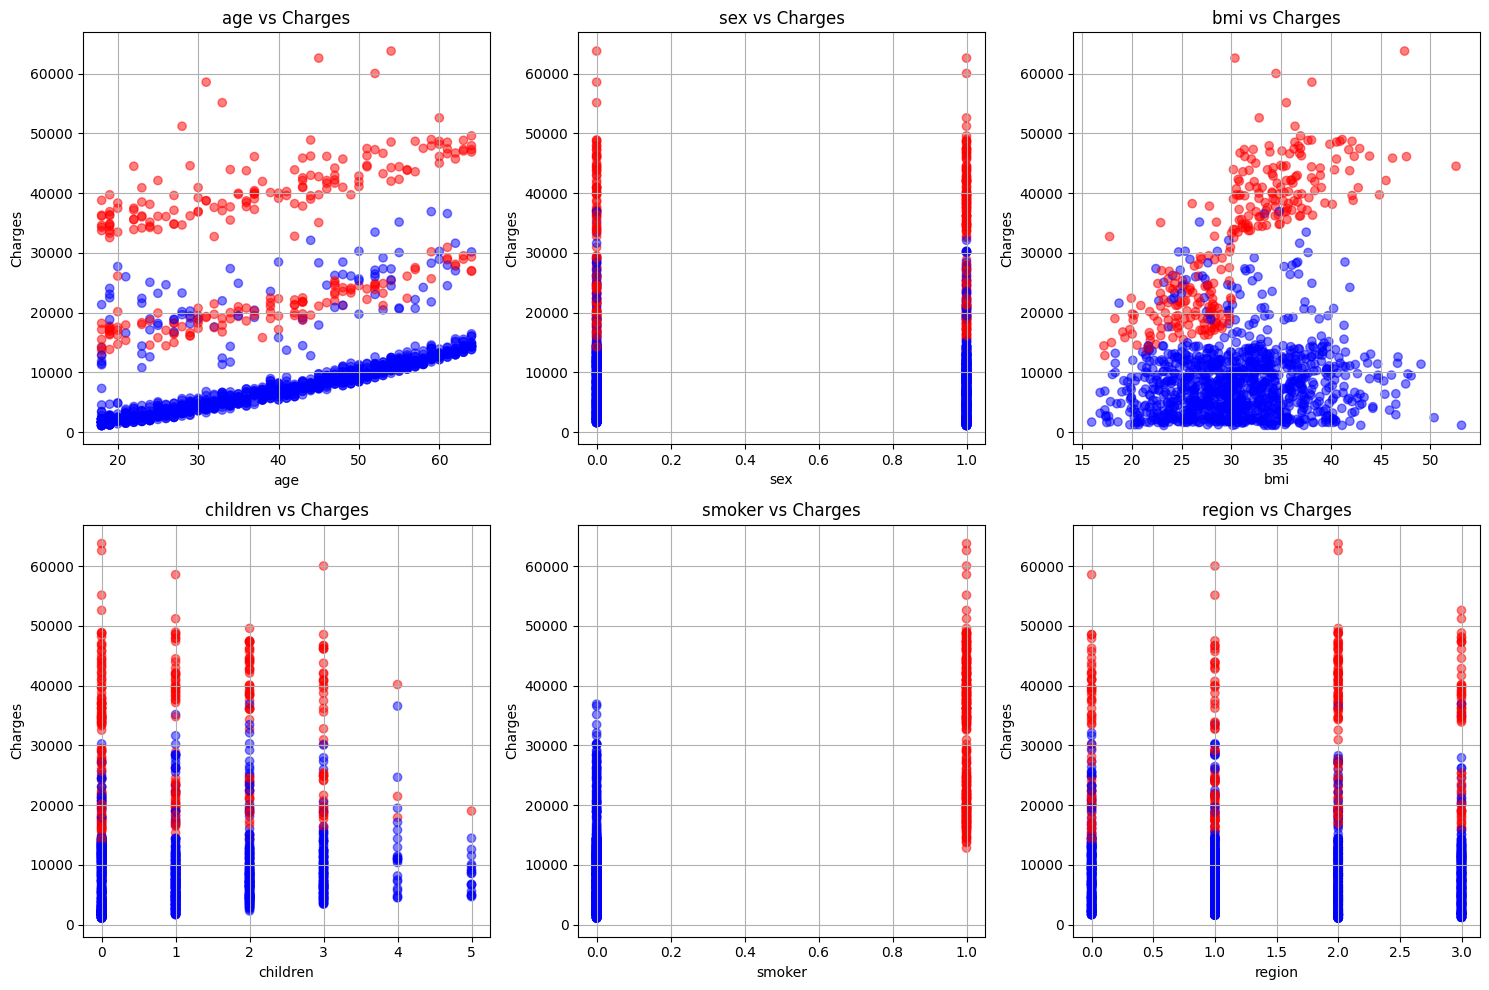

In [13]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    colors = data['smoker'].map({0: 'blue', 1: 'red'})
    plt.scatter(data[feature], data['charges'], alpha=0.5, c=colors)
    plt.xlabel(feature)
    plt.ylabel('Charges')
    plt.title(f'{feature} vs Charges')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Pe baza scatter-plot-urilor:

    age vs. charges: 
        se observă o tendinta crescatoare, aceasta sugereaza ca pacientii mai in varsta au, in medie, costuri medicale mai mari 
        I. (0–15,000 $) pentru nefumatori tineri
        II. (0–15,000 $) pentru nefumatori tineri
        III. (10,000–30,000 $) pentru nefumatori mai in varsta
        IV. (20,000–60,000 $) pentru fumatori, care creste mai clar cu varsta
        
    sex vs. charges:  -> 0-FEMALE 1-MALE
        doua benzi distincte pentru valori 0 si 1 
        graficul arata o distributie similara a costurilor atat 
        pt femei cat si pt barbati , separarea clara intre               ne/fumatori 
        nu avem o diferenta semnificativa a costului mediu intre         femei si barbati => sexul nu influeteaza puternic rata           asigurarilor 
        

    bmi vs. charges: 
        BMI(body mass index) = greutate (kg) / (înălțime (m))²  ->   indicator al obezitatii 
        aici se analizeaza relatia dintre bmi si cheltuielile medicale 
        BMI < 25 : costuri intre 3000 si 20.000 -> efect moderat 
        BMI > 30 : aici se depaseste pragul de obezitate 
![BMI vs Charges](bmi.png)
        
        ceea ce ne indica ca costurile cresc semnificativ (20.000 – 60.000 $) pt fumatori , in schimb nefumatorii au costuri mai mici (<20.000$) 

    children vs. charges: 
        children este nr. intreg din intervalul (0 – 5). Se observa o crestere a costurilor medii pe masura ce nr. de copii creste:
        0 copii: 11.000 $ in medie
        1 copil: 12.000 $
        2 copii: 13.000 $
        3+ copii: variatie mai mare

    smoker vs. charges: 
        cea mai mare diferenta: fumatorii - 1 au costuri medicale semnificativ mai mari decât nefumătorii - 0, cu medii de aproximativ 23.000 $ vs. 10.000 $
        valorile variază între 15.000 și 63.000 $ -> riscuri de imbolnavire ridicate
        Nefumatorii au costuri intre 2.000 și 20.000 $, ceea ce subliniază diferenta de 'obiceiuri'
        !!! se observa clar impactul fumatului !!!
        
    region vs. charges: 
        region are 4 valori codificate numeric: 0 = SW, 1 = SE, 2 = NW, 3 = NE.
        
        Observam o usoară diferenta in medii:
            SW (0) și SE (1): ~12.000 $
            NW (2) și NE (3): ~11.000 $
        
        Diferentele mici sugereaza un impact geografic redus


# Ex 3 -> train - 80% and validation -20%

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = data['charges']
X = data.drop('charges', axis=1)
X_train, X_val, y_train, y_val = train_test_split(
X, y, test_size=0.2, random_state=42)

#check
print(f"Dimensiuni X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Dimensiuni X_val:   {X_val.shape}, y_val:   {y_val.shape}")



Dimensiuni X_train: (1070, 6), y_train: (1070,)
Dimensiuni X_val:   (268, 6), y_val:   (268,)


# Ex 4 - Gradient Descent for Multiple Linear Regression

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


### step 1 - NO normalization 


# step 2 - add bias 

In [17]:
X_train_b = np.c_[np.ones(X_train.shape[0]), X_train]
X_val_b = np.c_[np.ones(X_val.shape[0]), X_val]

# step3 - cost function (MSE)
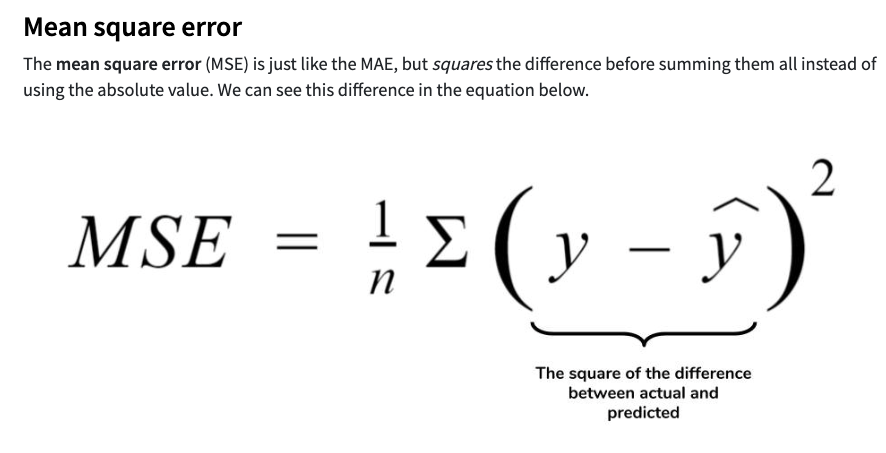

### dar pentru gradient descent folosim varianta cu factor 1/(2m) în loc de 1/m, deoarece derivata func. de cost devine mai simpla 

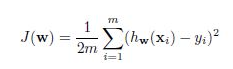


In [18]:
def compute_cost(X, y, w):
    m = len(y)
    return (1 / (2*m)) * np.sum((X.dot(w) - y) ** 2)



### step 4- Gradient Descent


In [19]:
def gradient_descent(X, y, w_init, lr, n_iters):
    m = len(y)
    w = w_init.copy()
    history = []
    for _ in range(n_iters):
        grad = (1/m) * X.T.dot(X.dot(w) - y)
        w -= lr * grad
        history.append(compute_cost(X, y, w))
    return w, history


### step4 - test Learning Rates

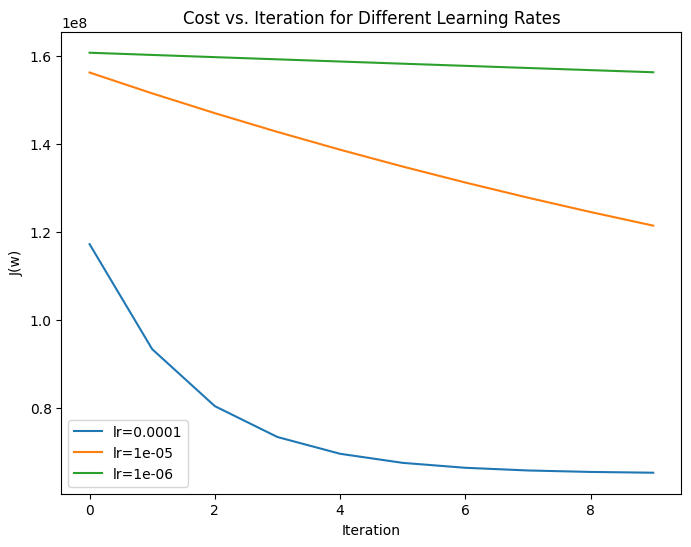

In [21]:
learning_rates = [1e-4, 1e-5, 1e-6]
n_iters = 10

plt.figure(figsize=(8, 6))
for lr in learning_rates:
    w0 = np.zeros(X_train_b.shape[1])
    w_final, cost_hist = gradient_descent(X_train_b, y_train.values, w0, lr, n_iters)
    plt.plot(cost_hist, label=f'lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('J(w)')
plt.title('Cost vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()

### step 5 - fiting with - cel mai stabil LR  1e-4

In [22]:
best_lr = 1e-4
w_init = np.zeros(X_train_b.shape[1])
w_final, 
cost_hist_final = gradient_descent(X_train_b, y_train.values, w_init,best_lr, n_iters)

In [23]:
final_cost_train = compute_cost(X_train_b, y_train.values, w_final)
final_cost_val = compute_cost(X_val_b, y_val.values, w_final)
print("Final weights:\n", w_final )    
print("\nFor Learning Rate :", best_lr)


Final weights:
 [0.13187391 5.66102606 0.07095081 4.17236618 0.15651679 0.06499673
 0.1988745 ]

For Learning Rate : 0.0001


# Ex 5 - R squared 

In [24]:
from sklearn.metrics import r2_score

# predictions

In [25]:
train_preds = X_train_b.dot(w_final)
val_preds   = X_val_b.dot(w_final)


# R² scores

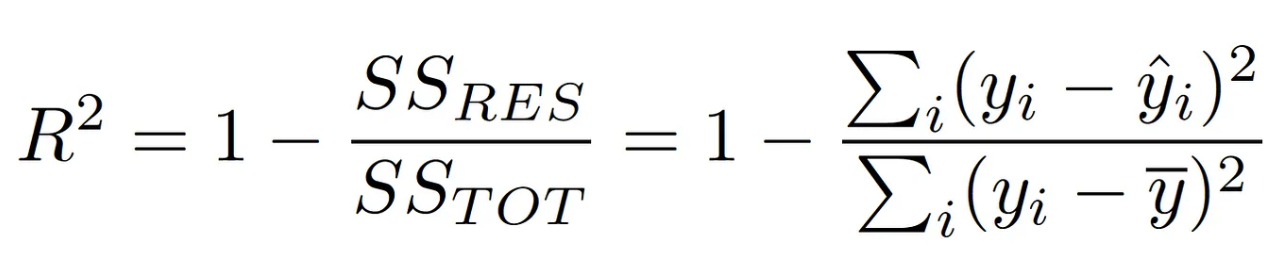

In [26]:
train_r2 = r2_score(y_train, train_preds)
val_r2   = r2_score(y_val,   val_preds)


In [28]:
print(f"Score R² (train): {train_r2: .2f}")
print(f"Score R² (validation): {val_r2: .2f}")


Score R² (train): -1.17
Score R² (validation): -1.02


#### R² < 0 => modelul are o peformanta mai slaba decat un model care ar prezice constant media valorilor reale . Val. neg indica faptul ca predictiile modelului sunt departe de valorile reale, iar erorile sunt foarte mari...
#### Nu am overfitting (ceea ce e de asteptat, pt ca modelul nici macar nu a inceput sa invete corect).

# Ex 6 - Normalization using z-score 

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

### normalization with z-score 

In [32]:
df_means = X_train.mean(axis=0)
df_stds = X_train.std(axis=0)
X_train_n = (X_train - df_means) / df_stds
X_val_n = (X_val - df_means) / df_stds
X_train_b = np.c_[np.ones(X_train_n.shape[0]), X_train_n]
X_val_b = np.c_[np.ones(X_val_n.shape[0]), X_val_n]

In [33]:
def compute_cost(X, y, w):
    m = len(y)
    return (1 / (2 * m)) * np.sum((X.dot(w) - y) ** 2)

In [34]:
def gradient_descent(X, y, w_init, lr, n_iters):
    m = len(y)
    w = w_init.copy()
    history = []
    for _ in range(n_iters):
        grad = (1 / m) * X.T.dot(X.dot(w) - y)
        w -= lr * grad
        history.append(compute_cost(X, y, w))
    return w, history

In [35]:
learning_rates = [1e-1, 1e-2, 1e-3]
n_iters = 10000

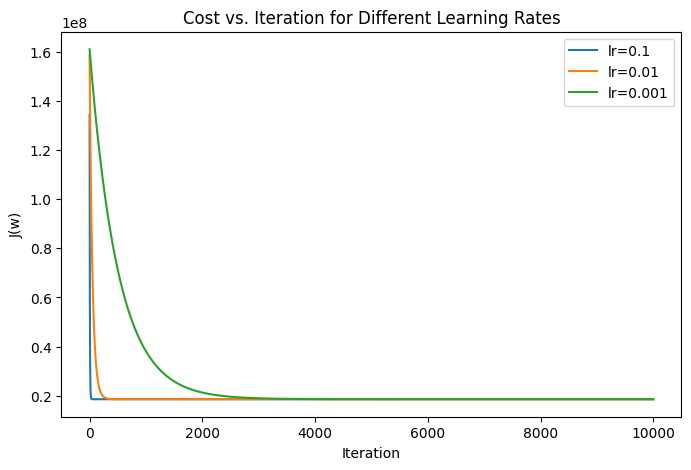

In [36]:
plt.figure(figsize=(8, 5))
for lr in learning_rates:
    w0 = np.zeros(X_train_b.shape[1])
    w_final, cost_hist = gradient_descent(X_train_b, y_train.values, w0, lr, n_iters)
    plt.plot(cost_hist, label=f'lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('J(w)')
plt.title('Cost vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()

In [37]:
best_lr = 1e-1
w_init = np.zeros(X_train_b.shape[1])
w_final, 
cost_hist_final = gradient_descent(X_train_b, y_train.values, w_init,best_lr, n_iters)

In [38]:
final_cost_train = compute_cost(X_train_b, y_train.values, w_final)
final_cost_val = compute_cost(X_val_b, y_val.values, w_final)
print("Final weights:\n", w_final )    
print("\nFor Learning Rate :", best_lr)


Final weights:
 [ 1.33454868e+04  3.61732827e+03 -9.04236985e+00  2.02936229e+03
  5.17102036e+02  9.56090654e+03 -3.02464016e+02]

For Learning Rate : 0.1


In [39]:
train_preds = X_train_b.dot(w_final)
val_preds   = X_val_b.dot(w_final)

train_r2 = r2_score(y_train, train_preds)
val_r2   = r2_score(y_val, val_preds)

print(f"Score R² (train): {train_r2: .2f}")
print(f"Score R² (validation): {val_r2: .2f}")


#### Un R² aprox egal cu 1 indica un model bun 
#### diferenta mare intre train si validation => OVERFITTING 

#### in cazul meu -> sunt de parere ca valorile de antrenare si validare sunt plauzibile si indica o performanta buna a modelului , fara un overfitting sever 

# CONCLUZII : PARALELA INTRE EX 4 SI EX 6 

Modelul initial -ex 4 (fara normalizare z-score):
Datele sunt folosite in forma lor 'bruta'.
Ex. age are valori in intervalul (18, 64), bmi intre (15,53) , iar charges intre (100,60000). 
Aceasta diferenta de scara face ca gradientul sa fie dominat de featureul cu valori mai mari, afectand ajustarea weight-urilor.
Modelul cu normalizare z-score de la ex 6:
Datele sunt transformate folosind z-score , astfel rezultand feature-uri cu medie aprox. 0 si deviattie standard aprox. 1 .
Aceasta uniformizeaza scara tuturor feature-urilor . 
De ce e mai bun?:
    Normalizarea elimina influența scarii variabile, iar Gradient Descent converge mai eficient si se evita dominarea unui feature asupra altuia.
    ++++ 
    Produce predictii mai precise (R² pozitiv si mai mare) si weight-uri mai bune => relatiile reale din date.

# Ex 7 - Features importance 

### step 1 : normalizare + bias 

#### step 2 : cost func + gradient_descent (same as ex 6 )

### step3: train model 

### step 4 : determine the importance of features

In [40]:
import copy 

In [41]:
coefficients = copy.deepcopy(w_final)
#
feature_importance = pd.DataFrame({
    # bias for the first column 
    'Feature': ['bias'] + X_train.columns.tolist(), 
    'Importance': np.abs(coefficients)
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
                        

### step 5 - plot 

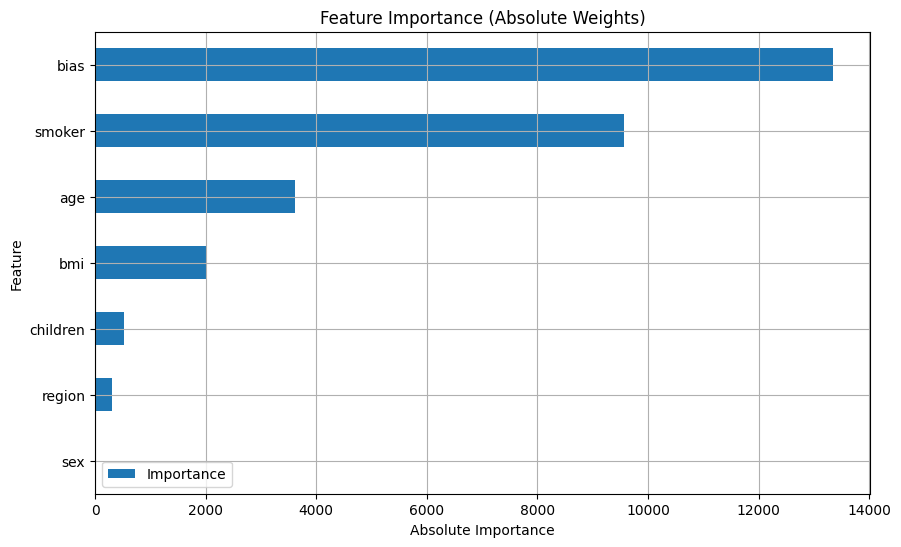

In [42]:
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.title('Feature Importance (Absolute Weights)')
plt.xlabel('Absolute Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

In [43]:
print(feature_importance)


    Feature    Importance
2       sex      9.042370
6    region    302.464016
4  children    517.102036
3       bmi   2029.362289
1       age   3617.328269
5    smoker   9560.906536
0      bias  13345.486849


### Din analiza graficului , a fi fumator are cea mai mare influenta , dupa care varsta si indicele de masa. Acestia sunt de fapt indicatori care reflecta 'risucrile de sanatate' care afecteaza costurile medicale. Restul feature urilor au un impact redus -> rol secundar in predictie   

# Ex 8 - Polynomial Regression 


### step 1 - polynomial cols

In [113]:
X_train_poly = X_train.copy()
X_val_poly   = X_val.copy()
for col in ['age','bmi','children']:
    for p in (2,3):
        X_train_poly[f'{col}^{p}'] = X_train[col] ** p
        X_val_poly[f'{col}^{p}']   = X_val[col]   ** p


### step 2 - z-score normalization + bias 

In [114]:
def zscore_normalize_features(df, mean=None, std=None):
    X = df.values.astype(float)
    if mean is None:
        mean = X.mean(axis=0)
        std  = X.std(axis=0)
        std[std==0] = 1.0
    X_norm = (X - mean) / std
    return X_norm, mean, std

X_train_n, mu, sigma = zscore_normalize_features(X_train_poly)
X_val_n, _, _       = zscore_normalize_features(X_val_poly, mu, sigma)



### step 3 - bias column 

In [115]:
m_train = X_train_n.shape[0]
m_val   = X_val_n.shape[0]
X_train_b = np.c_[np.ones((m_train,1)), X_train_n]
X_val_b   = np.c_[np.ones((m_val,1)),   X_val_n]


### step 4 - first train

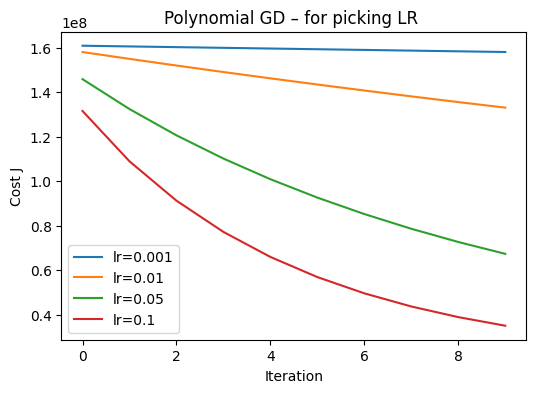

In [116]:
lrs = [0.001, 0.01, 0.05, 0.1]
iters_small = 10
plt.figure(figsize=(6,4))
for lr in lrs:
    w0 = np.zeros(X_train_b.shape[1])
    _, Jhist = gradient_descent(X_train_b, y_train.values, w0, lr, iters_small)
    plt.plot(Jhist, label=f'lr={lr}')
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title('Polynomial GD – for picking LR ')
plt.legend()
plt.show()

### step 5 - GD run 

Iteration     0, Cost: 1.45870e+08


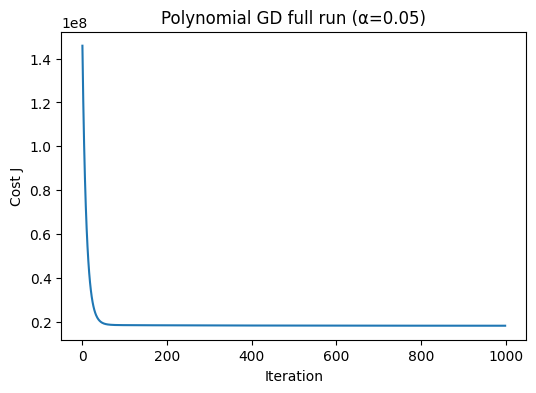

In [117]:
lr_chosen = 0.05
iters_full = 1000
w_init = np.zeros(X_train_b.shape[1])
w_final, cost_history = gradient_descent(
    X_train_b, y_train.values,
    w_init, lr_chosen, iters_full,
    print_cost=True
)

plt.figure(figsize=(6,4))
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.title(f'Polynomial GD full run (α={lr_chosen})')
plt.show()


### step 6 - r2

In [118]:
y_train_pred = X_train_b.dot(w_final)
y_val_pred   = X_val_b.dot(w_final)

print(f"R² train (polynomial): {r2_score(y_train, y_train_pred):.2f}")
print(f"R² val   (polynomial): {r2_score(y_val,   y_val_pred):.2f}")

R² train (polynomial): 0.75
R² val   (polynomial): 0.78


Extinderea spre polinomiale aduce un plus de precizie , un LR mai mare facea costul sa oscileze, iar unul mai mic ar fi incetinit prea mult antrenarea , nu am overfitting fiindca am val > train . Modelul nu invata pe de rost ! 

### Ex - 9  features importance (polynomial)

In [119]:
poly_feature_names = poly.get_feature_names_out(input_features=X_train.columns)


In [107]:
feature_names = ['bias'] + list(poly_feature_names)


In [108]:
importances = np.abs(w_final)


In [109]:
df_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=True)


<Figure size 600x400 with 0 Axes>

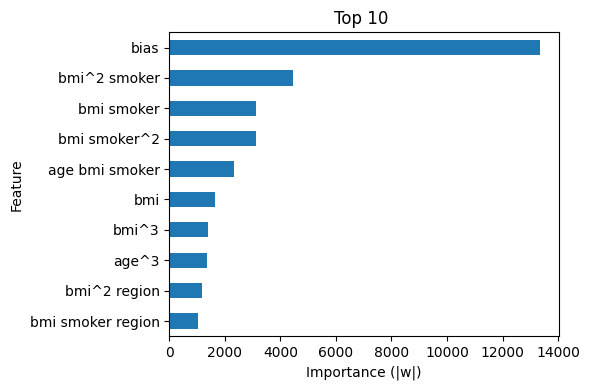

In [112]:
top10 = df_imp.tail(10)

plt.figure(figsize=(6,4))
top10.plot(
    x='Feature', y='Importance',
    kind='barh',
    legend=False,
    figsize=(6,4)
)
plt.title('Top 10 ')
plt.xlabel('Importance (|w|)')
plt.tight_layout()
plt.show()


# Ex. 10 - Bonus

In [76]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_arr    = poly.fit_transform(X)
feature_names = poly.get_feature_names_out(input_features=X.columns)
X_poly_df     = pd.DataFrame(X_poly_arr, columns=feature_names, index=X.index)

selected = ['bmi^2', 'age^2', 'bmi smoker', 'age children', 'children']
X_sel = X_poly_df[selected]

X_tr, X_va, y_tr, y_va = train_test_split(X_sel, y, test_size=0.2, random_state=42)

scaler   = StandardScaler()
X_tr_sc  = scaler.fit_transform(X_tr)
X_va_sc  = scaler.transform(X_va)

model    = LinearRegression()
model.fit(X_tr_sc, y_tr)

print("R² Train (bonus subset):", model.score(X_tr_sc, y_tr))
print("R² Val   (bonus subset):", model.score(X_va_sc, y_va))


R² Train (bonus subset): 0.8149872247888934
R² Val   (bonus subset): 0.8511282641476563
